In [1]:
# Render our plots inline            #si pb : recherche sur google: modification de l'objet===l'objet====librairie===python
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import seaborn as sns
from pandas.api.types import CategoricalDtype

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.precision = 2
plt.rcParams['figure.figsize'] = (10, 5) #(L,l)


data_clean = pd.read_csv("openfoodfacts_imputed2.csv",sep="\t",encoding='utf-8') #caractères non lisibles [countries_en] par utf-8 
df = data_clean.copy()


Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
# Suppression des outliers 
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]



print("df:", df.shape)
df.head()

df: (49248, 19)


,brands_tags,countries_en,product_name,energy_100g,energy-kj_100g,energy-kcal_100g,proteins_100g,fat_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,saturated-fat_100g,fiber_100g,nutriscore_score,nutriscore_grade,sugcar_pct,satfat_pct,pnns_groups_21
0,grimbergen,France,Grimbergen - 33cl grimbergen ambree - 6.50 deg...,239.00,239.00,57.00,0.50,0.10,4.40,0.80,0.01,4.00e-03,0.00,0.72,1.41,b,0.18,0.00,Alcoholic beverages
1,missing_value,Spain,Classic cosmopolitan non-alcoholic cocktail mi...,498.00,498.00,119.00,0.00,0.00,29.66,28.81,0.00,0.00e+00,0.00,0.00,3.58,c,0.97,41.64,Alcoholic beverages
2,hangtime,Switzerland,Hangtime Pinot Noir,1114.40,1114.40,271.82,7.65,13.22,28.67,14.39,1.15,4.61e-01,5.18,2.28,8.74,c,0.61,17.08,Alcoholic beverages
3,missing_value,France,Blenbeb Scotch Whisky,1112.75,1112.75,271.43,7.64,13.23,28.68,14.41,0.00,0.00e+00,5.18,2.28,8.73,c,0.61,17.08,Alcoholic beverages
4,missing_value,Switzerland,Classic lime the original margarita mix,385.00,385.00,92.00,0.00,0.00,23.33,20.00,0.12,4.60e-02,0.57,0.79,2.64,b,0.86,36.61,Alcoholic beverages


In [105]:
df_show = df[["countries_en","product_name","nutriscore_grade","energy-kcal_100g","nutriscore_score"]].sort_values(["nutriscore_score"], ascending = (False)).sort_values(["energy-kcal_100g"],  ascending = (True))
df_show.head(10)

,countries_en,product_name,nutriscore_grade,energy-kcal_100g,nutriscore_score
3372,France,Petit Broyé,e,0.0,19.0
3989,United States,Mini Madeleine Chocolat,e,18.0,21.0
30721,Belgium,Boudins blancs,e,24.1,19.0
45956,Switzerland,Detox Smoothie,e,59.0,19.0
40169,Germany,Mangue,e,61.0,19.0
39481,Spain,Ginger beer,e,61.0,19.0
24307,France,Nectar fraise,e,62.0,19.0
2361,France,Coconut-Pineapple Nectar From Concentrate,e,63.0,19.0
40451,Spain,Cosmo,e,64.0,19.0
46518,France,100% juice from spanish grapes,e,65.0,20.0


## ANALYSE UNIVARIEE sous forme de graphique

### Variables qualitatives

In [3]:
df.select_dtypes(include=['object']).nunique()

brands_tags         15465
countries_en          270
product_name        44785
nutriscore_grade        5
pnns_groups_21         44
dtype: int64

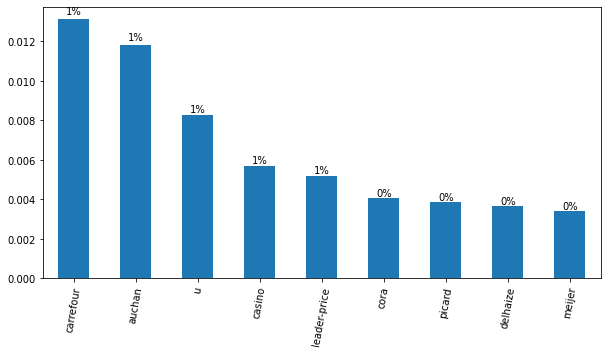

In [4]:
ax = df["brands_tags"].value_counts(normalize=True).iloc[1:10,].plot(kind='bar')
plt.xticks(rotation=80)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.show()

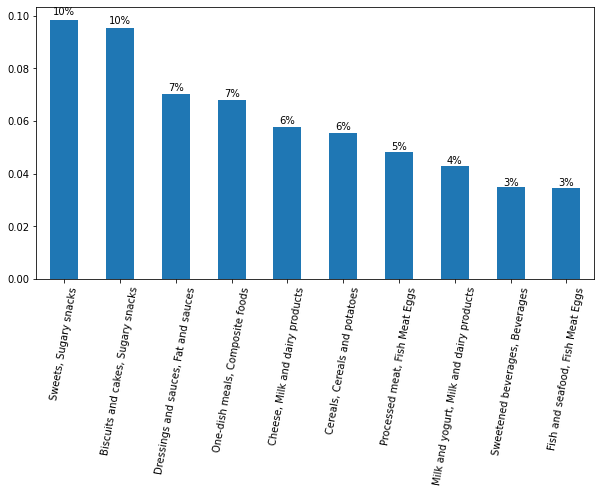

In [5]:
ax = df["pnns_groups_21"].value_counts(normalize=True).iloc[:10,].plot(kind='bar')
plt.xticks(rotation=80)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.show()

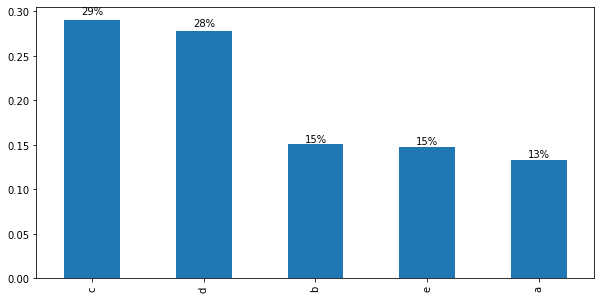

In [7]:
#nutriscore_grade  AVEC REGRESSION LINEAIRE
ax = df["nutriscore_grade"].value_counts(normalize=True).plot(kind='bar')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')
plt.show()

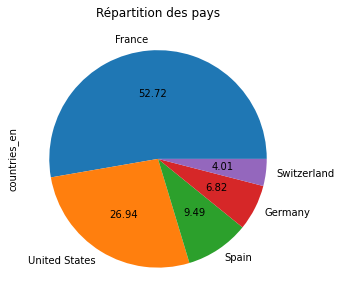

In [8]:
ax =  df["countries_en"].value_counts(normalize=False).iloc[:5,].plot(kind='pie', autopct='%.2f')

    
plt.title("Répartition des pays")

plt.show() 

### Variables quantitatives

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
# Suppression des outliers 
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


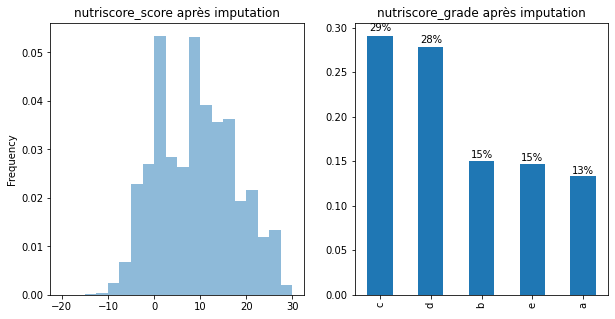

In [10]:
plt.rcParams['figure.figsize'] = (10, 5) #(L
df = pd.read_csv("openfoodfacts_imputed2.csv",sep="\t",encoding='utf-8') #caractères non lisibles [countries_en] par utf-8 

figure, axes = plt.subplots(1, 2)

ax0 = df["nutriscore_score"].plot.hist(ax=axes[0],alpha=0.5,density=True,bins=20, range = (-20, 30))
ax = df["nutriscore_grade"].value_counts(normalize=True).plot(ax=axes[1],kind='bar')
ax0.set_title("nutriscore_score après imputation")
ax.set_title("nutriscore_grade après imputation")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')
    
plt.show()

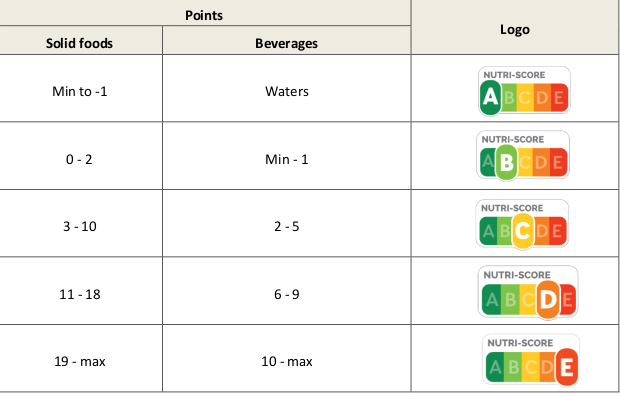

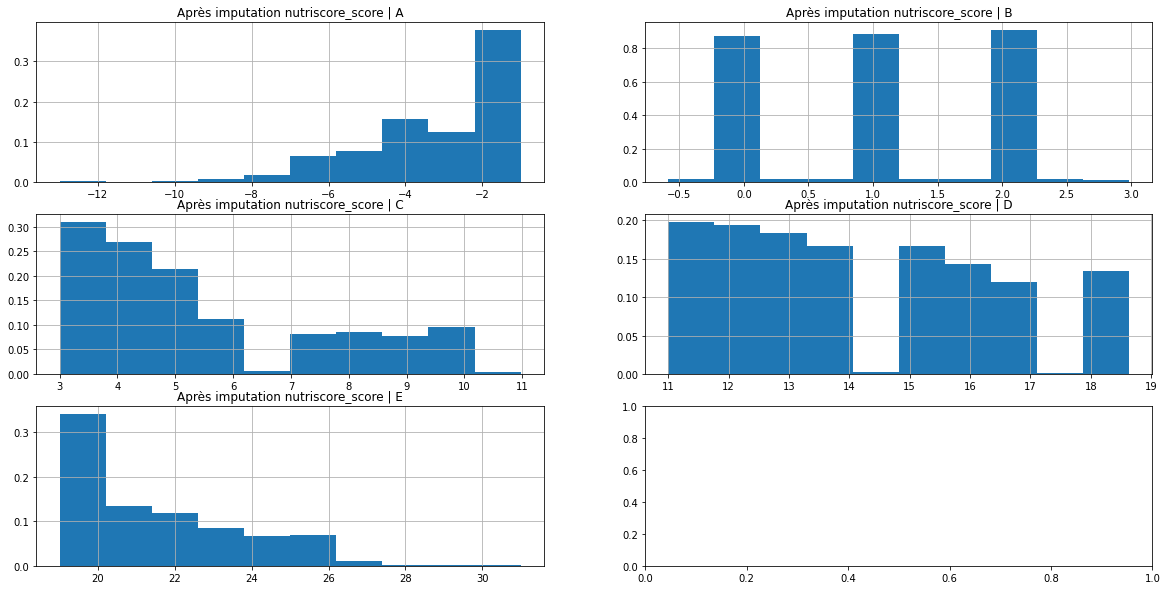

<Figure size 1440x720 with 0 Axes>

In [11]:
plt.rcParams['figure.figsize'] = (20, 10) #(L,l)
figure, axes = plt.subplots(3, 2)
ax1 = df_out[df_out["nutriscore_grade"] == 'a']["nutriscore_score"].hist(ax=axes[0,0],density=True)
ax1.set_title("Après imputation nutriscore_score | A")
ax2 = df_out[df_out["nutriscore_grade"] == 'b']["nutriscore_score"].hist(ax=axes[0,1],density=True)
ax2.set_title("Après imputation nutriscore_score | B")
ax3 = df_out[df_out["nutriscore_grade"] == 'c']["nutriscore_score"].hist(ax=axes[1,0],density=True)
ax3.set_title("Après imputation nutriscore_score | C")
ax4 = df_out[df_out["nutriscore_grade"] == 'd']["nutriscore_score"].hist(ax=axes[1,1],density=True)
ax4.set_title("Après imputation nutriscore_score | D")
ax5 = df_out[df_out["nutriscore_grade"] == 'e']["nutriscore_score"].hist(ax=axes[2,0],density=True)
ax5.set_title("Après imputation nutriscore_score | E")
plt.figure();

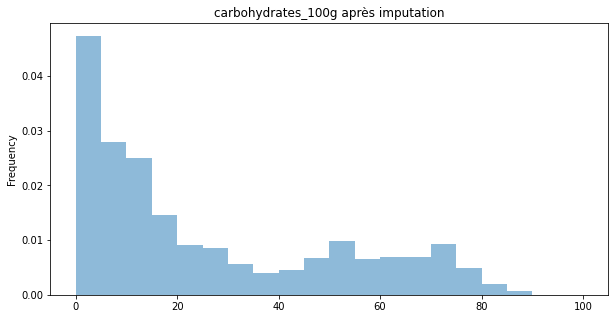

In [12]:
plt.rcParams['figure.figsize'] = (10, 5) 
sucre = df_out[df_out['carbohydrates_100g'] > 0]
ax= sucre["carbohydrates_100g"].plot.hist(alpha=0.5,density=True,bins=20, range = (0, 100))
ax.set_title("carbohydrates_100g après imputation")
plt.show()

# Mesures de tendance centrale, de dispersion et de forme

In [13]:
df_out.describe(include="all") #pour les varaibles qualitatives

,brands_tags,countries_en,product_name,energy_100g,energy-kj_100g,energy-kcal_100g,proteins_100g,fat_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,saturated-fat_100g,fiber_100g,nutriscore_score,nutriscore_grade,sugcar_pct,satfat_pct,pnns_groups_21
count,22060,22010,22019,22060.00,2.21e+04,22060.00,22060.00,22060.00,22060.00,22060.00,22060.00,22060.00,22060.00,22060.00,22060.00,22060,22060.00,22060.00,22060
unique,7168,204,20563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,43
top,missing_value,France,Ice Cream,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d,NaN,NaN,"Biscuits and cakes, Sugary snacks"
freq,4340,10203,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5941,NaN,NaN,2779
mean,NaN,NaN,NaN,924.80,9.25e+02,221.75,7.48,9.82,24.89,8.14,0.84,0.34,3.39,1.85,7.12,NaN,0.47,0.33,NaN
std,NaN,NaN,NaN,604.02,6.04e+02,144.14,5.77,9.60,24.79,10.32,0.70,0.28,3.93,1.53,8.12,NaN,0.35,0.24,NaN
min,NaN,NaN,NaN,0.00,-7.11e-11,0.00,-0.56,0.00,-30.63,-5.92,0.00,0.00,0.00,-1.45,-13.00,NaN,-0.03,-0.71,NaN
25%,NaN,NaN,NaN,402.00,4.02e+02,97.00,3.10,1.79,4.70,1.00,0.15,0.06,0.30,0.62,1.00,NaN,0.11,0.14,NaN
50%,NaN,NaN,NaN,837.00,8.37e+02,200.00,6.20,6.60,13.89,3.42,0.78,0.31,1.80,1.63,5.00,NaN,0.46,0.31,NaN
75%,NaN,NaN,NaN,1430.25,1.43e+03,342.00,11.00,16.00,46.11,11.33,1.30,0.52,5.00,2.72,14.00,NaN,0.81,0.50,NaN


In [14]:
#mode mediane et moyenne
df_out.select_dtypes(include=['float64']).agg([lambda x:x.value_counts().index[0], 'median','mean'])

,energy_100g,energy-kj_100g,energy-kcal_100g,proteins_100g,fat_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,saturated-fat_100g,fiber_100g,nutriscore_score,sugcar_pct,satfat_pct
<lambda>,1494.0,1494.0,357.00,0.50,0.50,0.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,0.00
median,837.0,837.0,200.00,6.20,6.60,13.89,3.42,0.78,0.31,1.80,1.63,5.00,0.46,0.31
mean,924.8,924.8,221.75,7.48,9.82,24.89,8.14,0.84,0.34,3.39,1.85,7.12,0.47,0.33


In [15]:
# Calcul de l'Ecart max entre le mode et la moyenne
df_select = df_out.select_dtypes(include=['float64']).agg([lambda x:abs(x.value_counts().index[0] - x.mean())]).apply(lambda s: s.apply('{0:.5f}'.format))
df_select

,energy_100g,energy-kj_100g,energy-kcal_100g,proteins_100g,fat_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,saturated-fat_100g,fiber_100g,nutriscore_score,sugcar_pct,satfat_pct
<lambda>,569.19864,569.19864,135.24626,6.98406,9.31843,24.88873,8.13766,0.83911,0.33563,3.38791,1.84606,4.12186,0.53368,0.33476


In [16]:
df_select[0:1].columns.sort_values(ascending=True)

Index(['carbohydrates_100g', 'energy-kcal_100g', 'energy-kj_100g',
       'energy_100g', 'fat_100g', 'fiber_100g', 'nutriscore_score',
       'proteins_100g', 'salt_100g', 'satfat_pct', 'saturated-fat_100g',
       'sodium_100g', 'sugars_100g', 'sugcar_pct'],
      dtype='object')

Ecart max pour  `carbohydrates_100g` pour l'analyse par catégorie et `fat_100g` l'analyse bivariée avec deux variables qualitatives.

### carbohydrates_100g par catégorie : mesures de tendance centrales

In [110]:


data_clean = pd.read_csv("openfoodfacts_imputed2.csv",sep="\t",encoding='utf-8') #caractères non lisibles [countries_en] par utf-8 
df = data_clean.copy()


Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
# Suppression des outliers 
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]



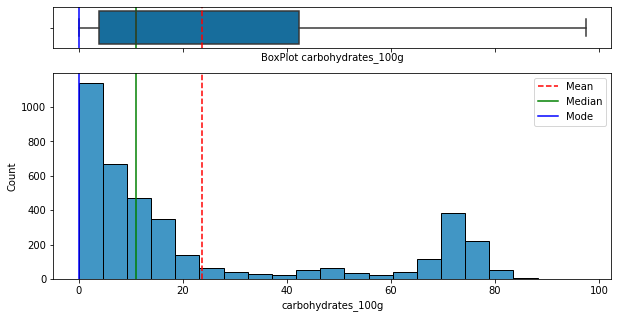

In [111]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 5) 


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})

df_a = df_out[df_out.nutriscore_grade == "a"]
df_b = df_out[df_out.nutriscore_grade == "b"]
df_c = df_out[df_out.nutriscore_grade == "c"]
df_d = df_out[df_out.nutriscore_grade == "d"]
df_e = df_out[df_out.nutriscore_grade == "e"]

list_df = [df_a]

for df in list_df : 
    mean=df['carbohydrates_100g'].mean()
    median=df['carbohydrates_100g'].median()
    mode=df['carbohydrates_100g'].mode().values[0]

    sns.boxplot(data=df, x="carbohydrates_100g", ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    ax_box.axvline(mode, color='b', linestyle='-')
    
    sns.histplot(data=df, x="carbohydrates_100g")
    ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
    ax_hist.axvline(median, color='g', linestyle='-', label="Median")
    ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
    
ax_hist.legend()
ax_hist.set(xlabel='carbohydrates_100g') 
ax_box.set(xlabel='BoxPlot carbohydrates_100g')
plt.show();

In [18]:
print ("a : ",df_out[df_out.nutriscore_grade == "a"]["carbohydrates_100g"].agg([lambda x:x.value_counts().index[0],'median', "mean"]))
print ("b : ",df_out[df_out.nutriscore_grade == "b"]["carbohydrates_100g"].agg([lambda x:x.value_counts().index[0],'median', "mean"]))
print ("c : ",df_out[df_out.nutriscore_grade == "c"]["carbohydrates_100g"].agg([lambda x:x.value_counts().index[0],'median', "mean"]))
print ("d : ",df_out[df_out.nutriscore_grade == "d"]["carbohydrates_100g"].agg([lambda x:x.value_counts().index[0],'median', "mean"]))
print ("e : ",df_out[df_out.nutriscore_grade == "e"]["carbohydrates_100g"].agg([lambda x:x.value_counts().index[0],'median', "mean"]))


a :  <lambda>     0.00
median      11.00
mean        23.79
Name: carbohydrates_100g, dtype: float64
b :  <lambda>     0.00
median      10.00
mean        16.94
Name: carbohydrates_100g, dtype: float64
c :  <lambda>     0.00
median      13.00
mean        20.25
Name: carbohydrates_100g, dtype: float64
d :  <lambda>     0.00
median      24.00
mean        29.54
Name: carbohydrates_100g, dtype: float64
e :  <lambda>     1.00
median      50.20
mean        40.18
Name: carbohydrates_100g, dtype: float64


Distribution est dite symétrique: 
Mode = Med = Moy

Distribution est étalée à droite (ou oblique à gauche, ou présentant une asymétrie positive) 
Mode < Med < Moy

Distribution est étalée à gauche (ou oblique à droite) 
Mode > Med > Moy

### carbohydrates_100g par catégorie : mesures de dispersion

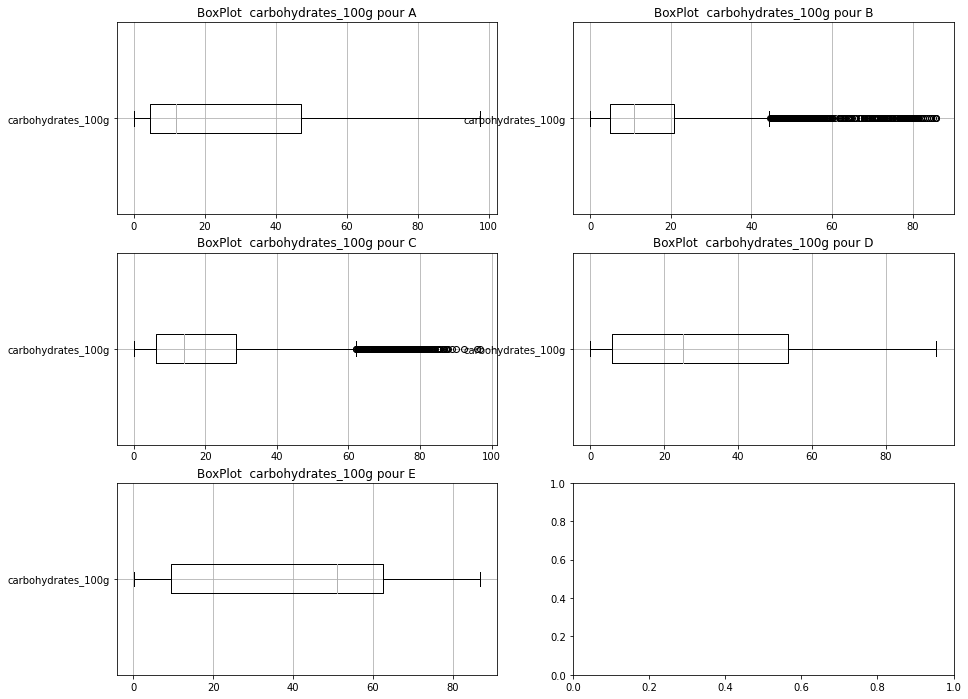

<Figure size 1080x864 with 0 Axes>

In [94]:
plt.rcParams['figure.figsize'] = (15, 12)
figure, axes = plt.subplots(3, 2)

ax1 = df_out[df_out.nutriscore_grade == "a"].boxplot(ax=axes[0,0],column="carbohydrates_100g", vert=False)
ax1.set_title("BoxPlot  carbohydrates_100g pour A")
ax2 = df_out[df_out.nutriscore_grade == "b"].boxplot(ax=axes[0,1],column="carbohydrates_100g", vert=False)
ax2.set_title("BoxPlot  carbohydrates_100g pour B")
ax3 = df_out[df_out.nutriscore_grade == "c"].boxplot(ax=axes[1,0],column="carbohydrates_100g", vert=False)
ax3.set_title("BoxPlot  carbohydrates_100g pour C")
ax4 = df_out[df_out.nutriscore_grade == "d"].boxplot(ax=axes[1,1],column="carbohydrates_100g", vert=False)
ax4.set_title("BoxPlot  carbohydrates_100g pour D")
ax5 = df_out[df_out.nutriscore_grade == "e"].boxplot(ax=axes[2,0],column="carbohydrates_100g", vert=False)
ax5.set_title("BoxPlot  carbohydrates_100g pour E")
plt.figure();

In [20]:
print ("a : ",df_out[df_out.nutriscore_grade == "a"]["carbohydrates_100g"].agg(['var', "std"]))
print ("b : ",df_out[df_out.nutriscore_grade == "b"]["carbohydrates_100g"].agg(['var', "std"]))
print ("c : ",df_out[df_out.nutriscore_grade == "c"]["carbohydrates_100g"].agg(['var', "std"]))
print ("d : ",df_out[df_out.nutriscore_grade == "d"]["carbohydrates_100g"].agg(['var', "std"]))
print ("e : ",df_out[df_out.nutriscore_grade == "e"]["carbohydrates_100g"].agg(['var', "std"]))


a :  var    751.91
std     27.42
Name: carbohydrates_100g, dtype: float64
b :  var    375.73
std     19.38
Name: carbohydrates_100g, dtype: float64
c :  var    422.10
std     20.55
Name: carbohydrates_100g, dtype: float64
d :  var    662.74
std     25.74
Name: carbohydrates_100g, dtype: float64
e :  var    694.64
std     26.36
Name: carbohydrates_100g, dtype: float64


### carbohydrates_100g par catégorie : mesures de forme

In [21]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}


<IPython.core.display.Javascript object>

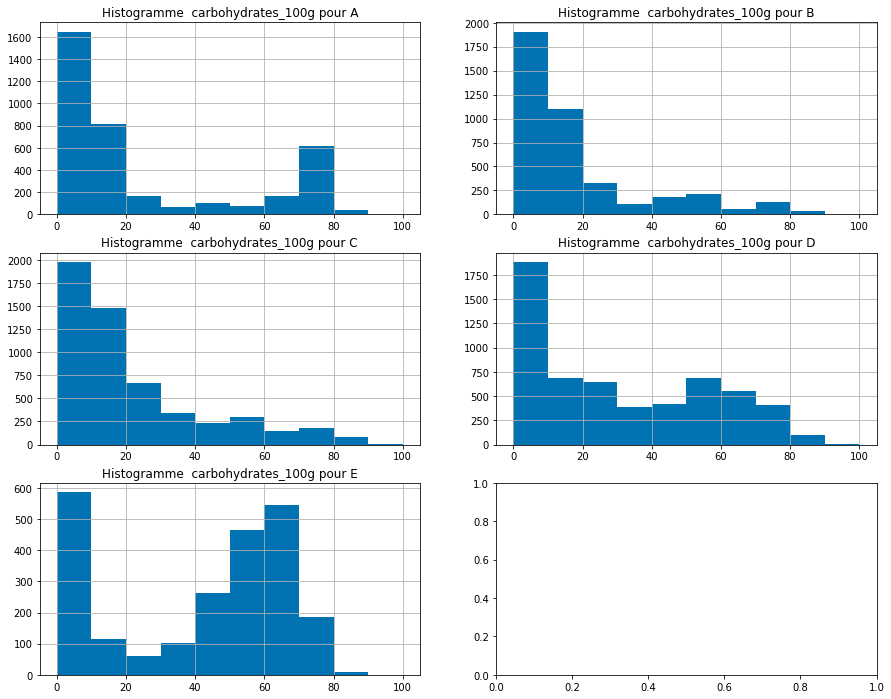

<Figure size 1080x864 with 0 Axes>

In [95]:
plt.rcParams['figure.figsize'] = (15, 12)

figure, axes = plt.subplots(3, 2)

ax1 = df_out[df_out.nutriscore_grade == "a"]["carbohydrates_100g"].hist(ax=axes[0,0], range = (0,100))
ax1.set_title("Histogramme  carbohydrates_100g pour A")

ax2 = df_out[df_out.nutriscore_grade == "b"]["carbohydrates_100g"].hist(ax=axes[0,1],  range = (0,100))
ax2.set_title("Histogramme  carbohydrates_100g pour B")

ax3 = df_out[df_out.nutriscore_grade == "c"]["carbohydrates_100g"].hist(ax=axes[1,0],  range = (0,100))
ax3.set_title("Histogramme  carbohydrates_100g pour C")

ax4 = df_out[df_out.nutriscore_grade == "d"]["carbohydrates_100g"].hist(ax=axes[1,1],  range = (0,100))
ax4.set_title("Histogramme  carbohydrates_100g pour D")

ax5 = df_out[df_out.nutriscore_grade == "e"]["carbohydrates_100g"].hist(ax=axes[2,0],  range = (0,100))
ax5.set_title("Histogramme  carbohydrates_100g pour E")

plt.figure();

In [23]:
print ("a : ",df_out[df_out.nutriscore_grade == "a"]["carbohydrates_100g"].agg(['skew', "kurtosis"]))
print ("b : ",df_out[df_out.nutriscore_grade == "b"]["carbohydrates_100g"].agg(['skew', "kurtosis"]))
print ("c : ",df_out[df_out.nutriscore_grade == "c"]["carbohydrates_100g"].agg(['skew', "kurtosis"]))
print ("d : ",df_out[df_out.nutriscore_grade == "d"]["carbohydrates_100g"].agg(['skew', "kurtosis"]))
print ("e : ",df_out[df_out.nutriscore_grade == "e"]["carbohydrates_100g"].agg(['skew', "kurtosis"]))


a :  skew        1.05
kurtosis   -0.57
Name: carbohydrates_100g, dtype: float64
b :  skew        1.75
kurtosis    2.30
Name: carbohydrates_100g, dtype: float64
c :  skew        1.39
kurtosis    1.16
Name: carbohydrates_100g, dtype: float64
d :  skew        0.45
kurtosis   -1.21
Name: carbohydrates_100g, dtype: float64
e :  skew       -0.44
kurtosis   -1.39
Name: carbohydrates_100g, dtype: float64


Skewness\
Si γ1=0 alors la distribution est symétrique.\
Si γ1>0 alors la distribution est étalée à droite.\
Si γ1<0 alors la distribution est étalée à gauche.

kurtosis :\
Si γ2=0 , alors la distribution a le même aplatissement que la distribution normale.\
Si γ2>0, alors elle est moins aplatie que la distribution normale : les observations sont plus concentrées.\
Si γ2<0 , alors les observations sont moins concentrées : la distribution est plus aplatie.

# Mesures de concentration

gini pour le carbohydrates_100g: 0.5207910422148633


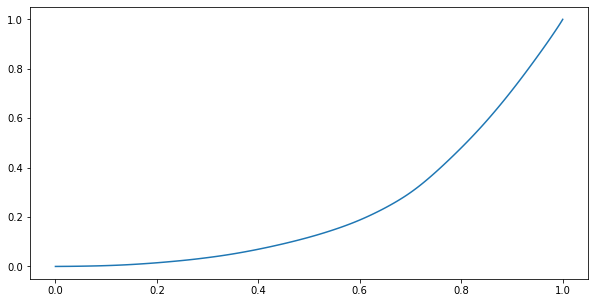

In [24]:
plt.rcParams['figure.figsize'] = (10, 5)
import numpy as np

sucre = df_out[df_out['carbohydrates_100g'] > 0]
suc = sucre['carbohydrates_100g'].values #mettre .values 

#Pour normaliser et faire en sorte que le haut de la courbe soit à 1, on divise le tout par  dep.sum()  .
lorenz = np.cumsum(np.sort(suc)) / suc.sum() #l faut trier les individus #Pour normaliser et faire en sorte que le haut de la courbe soit à 1, on divise le tout par  dep.sum() 
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

#linspace : Return evenly spaced numbers over a specified interval.
plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post') # intervalle réguliers de 0 à 1



aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2*S
print("gini pour le carbohydrates_100g:",gini)

plt.show()

gini pour le nutriscore_score: 0.6422212496251185


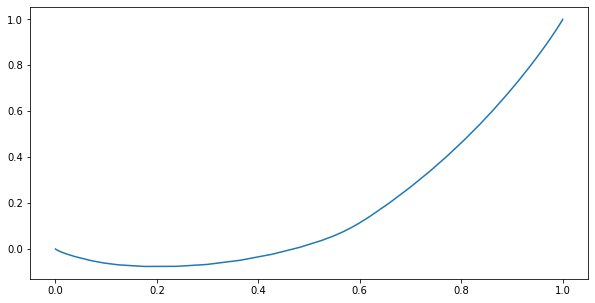

In [26]:
score = df_out[df_out['nutriscore_score'] > 0]
sco = sucre['nutriscore_score'].values #mettre .values 

#Pour normaliser et faire en sorte que le haut de la courbe soit à 1, on divise le tout par  dep.sum()  .
lorenz = np.cumsum(np.sort(sco)) / sco.sum() #l faut trier les individus #Pour normaliser et faire en sorte que le haut de la courbe soit à 1, on divise le tout par  dep.sum() 
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

#linspace : Return evenly spaced numbers over a specified interval.
plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post') # intervalle réguliers de 0 à 1


aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2*S
print("gini pour le nutriscore_score:",gini)

plt.show()

Il varie entre 0 (égalité parfaite) et 1 (inégalité extrême). 

=> Le nutriscore_score est plus inegalitaire entre les produits  


# Analyse bivariée : 2 variables quantitatives

"The nutritional score is calculated using the nutritional data listed on the package for 100 g

* Calories (Kcal/KJ)
* Amount of fat (g)
* Amount of saturated fatty acids (g)
* Amount of carbohydrates (g)
* Amount of sugars (g)
* Amount of protein (g)
* Amount of salt (mg) sodium(mg)
* Fibre (g)"

+ 
Fruits,
vegetables
pulses, nuts
rapeseed,
walnut 
olive oils (%)

+ Ratio
total saturated fatty acids/lipids

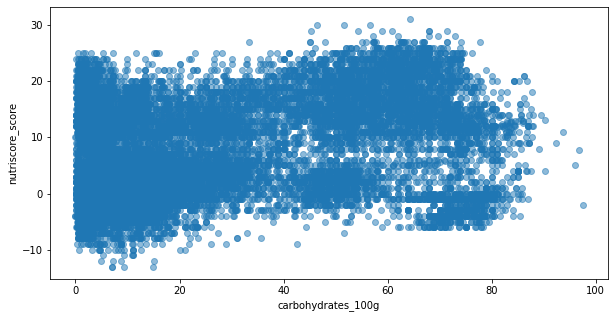

In [27]:
sucre_pos = df_out[df_out.carbohydrates_100g > 0 ]

plt.plot(sucre_pos["carbohydrates_100g"],sucre_pos["nutriscore_score"],'o',alpha=0.5)
plt.xlabel("carbohydrates_100g")
plt.ylabel("nutriscore_score")
plt.show()

On observe une relation linéaire croissante entre le sucre et le nutriscore

##### Covariance 

In [30]:
np.cov(sucre_pos["carbohydrates_100g"],sucre_pos["nutriscore_score"],ddof=0)[1,0] 

51.5255170499559

##### Coefficient de corrélation

In [106]:
import scipy.stats as st
st.pearsonr(sucre_pos["carbohydrates_100g"], sucre_pos["nutriscore_score"])[0] # r entre -1 et 1,

0.2556669780799444

s X,Y sera positif. == positivement correlées

sX,Y sera plutôt proche de 0  ==  non corrélés

sX,Y sera négatif ==  négativement correlée

##### Coefficient de détermination R2

In [29]:
coeff_determination = (st.pearsonr(sucre_pos["carbohydrates_100g"], sucre_pos["nutriscore_score"])[0])** 2
coeff_determination #[0,1]

0.06536560368053075

### Régression linéaire

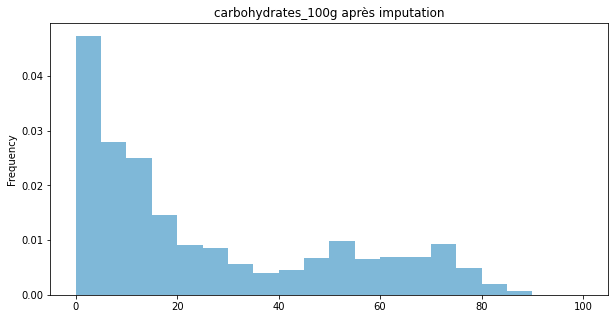

In [97]:
plt.rcParams['figure.figsize'] = (10, 5) 
sucre = df_out[df_out['carbohydrates_100g'] > 0]
ax= sucre["carbohydrates_100g"].plot.hist(alpha=0.5,density=True,bins=20, range = (0, 100))
ax.set_title("carbohydrates_100g après imputation")
plt.show()

carbohydrates_100g    0.08
intercept             5.04
dtype: float64


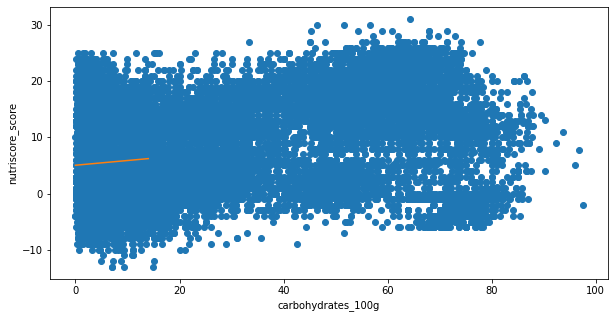

In [31]:
import statsmodels.api as sm
sucre_pos = df_out[(df_out.carbohydrates_100g > 0)  & (df_out.carbohydrates_100g < 100) ]

Y = sucre_pos['nutriscore_score']
X = sucre_pos[['carbohydrates_100g']]

X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['carbohydrates_100g'],result.params['intercept']

print(result.params)

plt.plot(sucre_pos.carbohydrates_100g,sucre_pos.nutriscore_score, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])

plt.xlabel("carbohydrates_100g")
plt.ylabel("nutriscore_score")
plt.show()

# Analyse bivariée : 1 variable quantitative et 1 qualitative

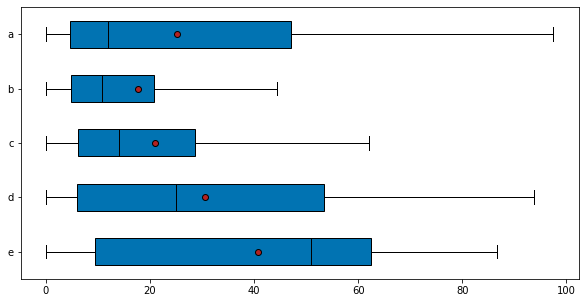

In [33]:
X = "nutriscore_grade" # qualitative
Y = "carbohydrates_100g" # quantitative


sous_echantillon = df_out[df_out["carbohydrates_100g"] > 0].copy()

# Changement de la palette graphique
sns.set_palette(sns.color_palette("colorblind", 3))

modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'} #la moyenne des valeurs.
    
ax1 = plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
#ax1.set_title("BoxPlot carbohydrates_100g avec la moyenne par classe")
plt.show()

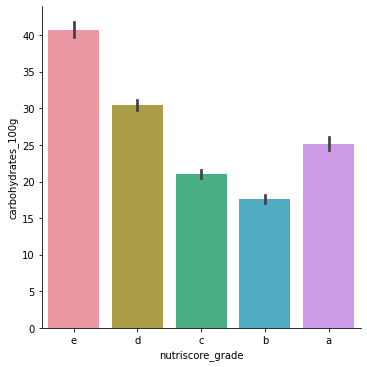

In [34]:
import seaborn as sns

#mean value and its confidence interval
sns.catplot(x="nutriscore_grade", y="carbohydrates_100g", kind="bar", data=sous_echantillon); 


 => cat B et C  mieux que cat A en terme de moyenne

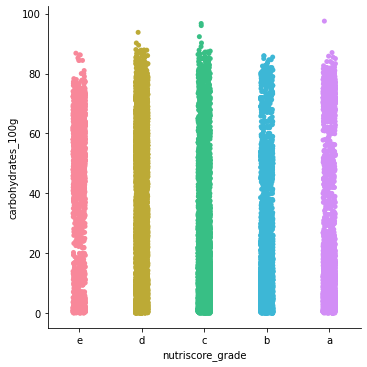

In [35]:
sns.catplot(x="nutriscore_grade", y="carbohydrates_100g", data=sous_echantillon);

C D == équivalent puis classememt B puis E puis A si taux de carbohydrates_100g élevé

## ANOVA - corrélation

In [36]:
X = "nutriscore_grade" # qualitative
Y = "carbohydrates_100g" # quantitative

# On ne garde que les dépenses
sous_echantillon = df_out[df_out["carbohydrates_100g"] >0]

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT     #variation interclasse / variation totale
    
eta_squared(sous_echantillon[X],sous_echantillon[Y]) #[0,1]

0.07996067669363843

eta_squared = 0:  les moyennes par classes sont toutes égales. Il n’y a donc pas a priori de relation entre les variables Y et X.


eta_squared = 1: moyennes par classes sont très différentes, il existe donc a priori une relation entre les variables Y et X. #oui

# Analyse bivariée : 2 variables qualitatives

In [37]:
#creation de classe pour le fat_100g

fat_pos = df_out[(df_out.fat_100g > 0) ]

fat_pos["fat_100g_disc1"] = pd.cut(fat_pos["fat_100g"], bins = 4)
fat_pos["fat_100g_disc1"] = fat_pos["fat_100g_disc1"].astype("str")

<ipython-input-37-f9d28cf2f391>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fat_pos["fat_100g_disc1"] = pd.cut(fat_pos["fat_100g"], bins = 4)
<ipython-input-37-f9d28cf2f391>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fat_pos["fat_100g_disc1"] = fat_pos["fat_100g_disc1"].astype("str")


In [39]:
X = "nutriscore_grade"
Y = "fat_100g_disc1"



c = fat_pos[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
cont = c.copy()

tx = fat_pos[X].value_counts()
ty = fat_pos[Y].value_counts()

cont.loc[:,"Total"] = tx
cont.loc["total",:] = ty
cont.loc["total","Total"] = len(fat_pos) # Ce comptage se fait grâce à la fonction  len  .


cont

fat_100g_disc1,"(-0.045, 11.501]","(11.501, 23.001]","(23.001, 34.5]","(34.5, 46.0]",Total
nutriscore_grade,,,,,
a,3831.0,79.0,3.0,1.0,3914.0
b,3971.0,235.0,11.0,8.0,4225.0
c,4434.0,902.0,199.0,66.0,5601.0
d,2037.0,2824.0,878.0,197.0,5936.0
e,125.0,1142.0,933.0,169.0,2369.0
total,14398.0,5182.0,2024.0,441.0,22045.0


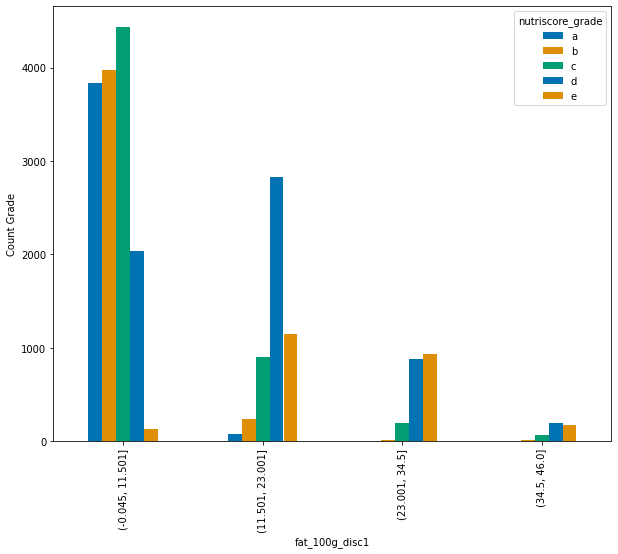

In [40]:
plt.rcParams['figure.figsize'] = (10,8)
ax = c.T.plot(kind='bar')
ylab = ax.set_ylabel('Count Grade')

(-0.0471, 11.775] Aliemen peu gras == A et C et D \   B sous représenté \
(11.775, 23.55]  Aliment moyennement gras == D et E\
(23.55, 35.325] Aliment gras == D et E \
(35.325, 47.1]    Aliment très gras  == D et E
  
  

  
Aliments très gras peu représentés. Je metrrait C D et E dans une même catégorie en ce qui concerne fat_100g

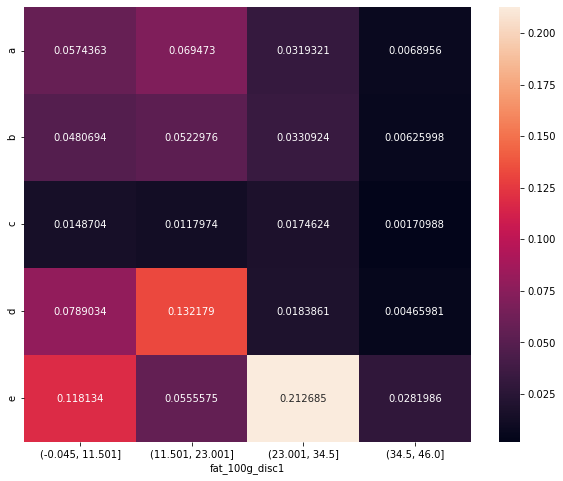

In [41]:
#calculent le tableau  indep  

tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns = ["foo"]
ty.columns = ["foo"]

n = len(fat_pos)

#calcul matriciel == tableau représentant le cas d'indépendance.
indep = tx.dot(ty.T) / n

c = c.fillna(0) # on remplace les valeurs nulles par des 0

#mesure "xi" #ξij pour chaque case du tableau

#foncé quand la mesure est grande proche de 1 , == pas independant == dépendant
#clair quand elle est proche de 0.== indépendant
mesure = (c-indep)**2/indep 
# #ξn  somme lignes et colonnes de chaque xi 
xi_n = mesure.sum().sum()  


#calcul de la contribution  à la non indépendance. 
sns.heatmap((mesure/xi_n),annot=True,  fmt='g') #chaque ξij en le divisant par ξn . entre 0 et 1.
plt.show()

#clair quand la mesure est grande proche de 1 , ==  dépendant
#fonce quand elle est proche de 0.              == indépendant
#chaque case une valeur comprise entre 0 et 1.

(-0.0471, 11.775] peu gras == E
(11.775, 23.55]   == E
(23.55, 35.325]   == E 
(35.325, 47.1]   == 

Donc  fat_100g est très dépendant à E

In [42]:
#test du χ2 d'indépendance 
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
# Pvalue : l'unique valeur nécessaire pour prendre notre décision
st_p

0.0

p_value obtenue par notre échantillon est de 0.0, ce qui est en dessous du seuil fixé de 1%. \
On peut donc rejeter l’hypothèse nulle qui est "les variables sont indépendantes".\
Les variables « nutriscore_grade » et « fat_100g_disc1 » sont dont dépendantes.

### Analyse Multivariee PCA

In [43]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from functions import * #functions.py dans le dossier

n_comp = 6
df_out = df_out.sample(n=70)

#Variables numériques
data_pca = df_out[["nutriscore_score","proteins_100g","fat_100g","carbohydrates_100g","sugars_100g",\
"saturated-fat_100g" ]]


#index des produits
names = df_out.index

#DF to array
X = data_pca.values 
print("OK")

#list de columns names
features = data_pca.columns
print("OK")

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
print("OK")

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)
print("OK")

OK
OK
OK
OK


In [44]:
data_pca.head()

,nutriscore_score,proteins_100g,fat_100g,carbohydrates_100g,sugars_100g,saturated-fat_100g
7690,2.0,10.0,4.0,50.0,2.0,1.0
29820,2.0,3.0,3.6,4.7,4.7,2.5
8455,-2.0,8.3,2.1,48.0,1.5,0.3
33661,12.0,19.6,3.1,1.9,1.4,1.3
30853,2.0,2.2,0.9,19.0,1.7,0.6


In [45]:
data_pca.shape

(70, 6)

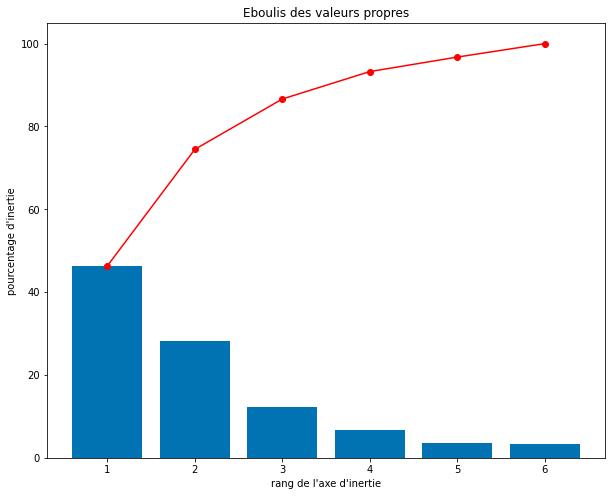

In [46]:
# Eboulis des valeurs propres
display_scree_plot(pca)

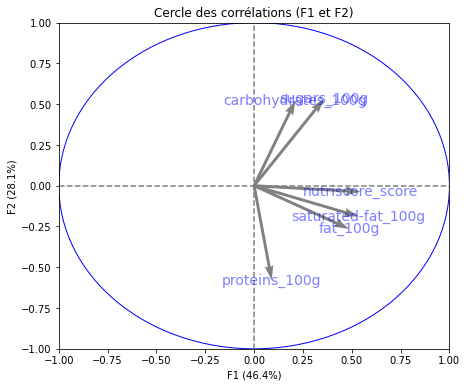

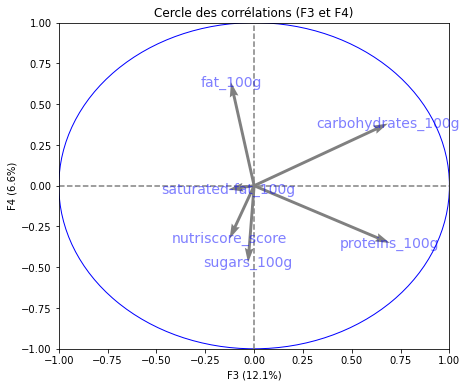

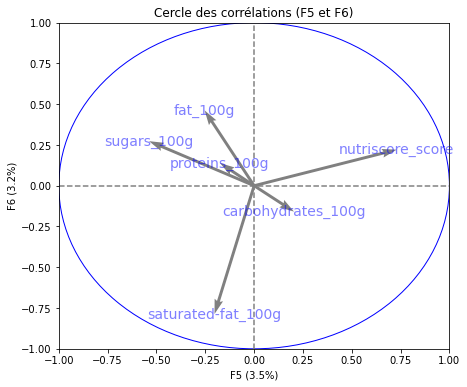

In [47]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))
# colonne == individus 

F1  :aliment gras mauvais pour la sante ~ nutriscore 
F2   aliment sucre

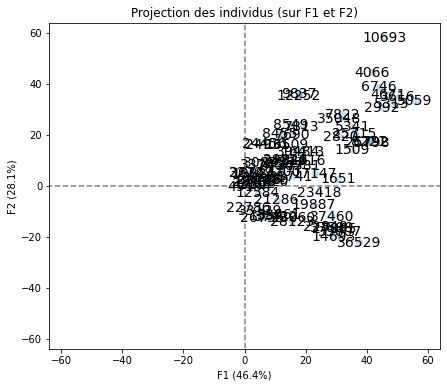

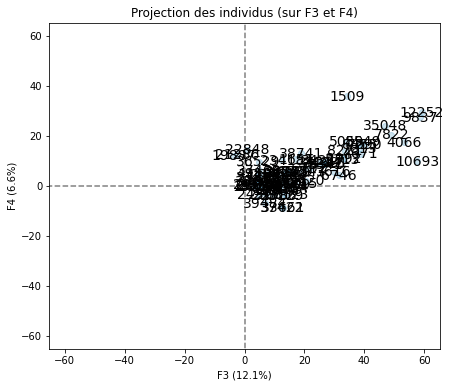

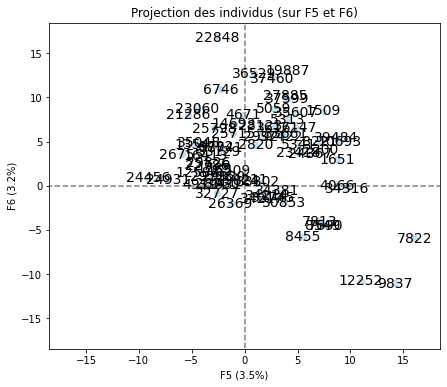

In [48]:
# projection des individus
X_projected = pca.transform(X)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], alpha = 0.2, labels = np.array(names))

In [49]:
result = df_out.loc[10693]
result  #exemple aliment gras et sucre

brands_tags                                                     spartan
countries_en                                              United States
product_name          Spartan, coco krunch sweetened rice cereal mad...
energy_100g                                                     1.7e+03
energy-kj_100g                                                  1.7e+03
energy-kcal_100g                                                4.1e+02
proteins_100g                                                       6.2
fat_100g                                                            6.2
carbohydrates_100g                                                   84
sugars_100g                                                          38
salt_100g                                                           1.6
sodium_100g                                                        0.66
saturated-fat_100g                                                    0
fiber_100g                                                      